In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sys, os
from os import path
from PIL import Image


## Webscrapping

Scraped British Airways reviews from the Skytrax website

In [2]:
url="https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
r=requests.get(url)
r.status_code

200

In [3]:
soup=BeautifulSoup(r.text,'html.parser')

In [4]:
reviews=soup.find_all('div',class_="text_content")

In [5]:
pages=37
page_size=100

review=[]

for i in range(1, pages + 1):
    print(f"scraping page{i}")
    url=f"{url}/page/{i}?sortby=post_date%3ADesc&pagesize={page_size}"
    
    for i in soup.find_all('div',class_="text_content"):
        reviews=i.text
        review.append(reviews)

scraping page1
scraping page2
scraping page3
scraping page4
scraping page5
scraping page6
scraping page7
scraping page8
scraping page9
scraping page10
scraping page11
scraping page12
scraping page13
scraping page14
scraping page15
scraping page16
scraping page17
scraping page18
scraping page19
scraping page20
scraping page21
scraping page22
scraping page23
scraping page24
scraping page25
scraping page26
scraping page27
scraping page28
scraping page29
scraping page30
scraping page31
scraping page32
scraping page33
scraping page34
scraping page35
scraping page36
scraping page37


In [6]:
review

["✅ Trip Verified |\xa0\xa0As always when I fly BA it was a total shambles. I was booked Manchester - London - Madrid , BA first leg and Iberia 2nd, I try wherever possible to avoid BA, however the Manchester - London was late, however I ran for my IB flight and got to B gates just as boarding started, being Group 1 I went to board and the gate sounded an alarm, BA had removed me from the IB flight to a BA flight 3 hours later! As BA had reissued the ticket IB could not put me back on the flight, so 3 hours wasted because of BA’s total incompetence. This airline is a total disgrace, the crew were not nice, typical BA crew oh im so fabulous I don't need to be nice to paying passengers, club europe cramped and terrible food! ",
 '✅ Trip Verified |  First time using BA business class but we were pleased with the service received. No one was waiting at check in/bag drop and through security in 2 minutes. We used the lounge in the b gates area which we found quiet with plenty of food and dr

In [7]:
df = pd.DataFrame()
df["review"] = review
df

,review
0,✅ Trip Verified | As always when I fly BA it ...
1,✅ Trip Verified | First time using BA busines...
2,Not Verified | Extremely rude ground service....
3,✅ Trip Verified | My son and I flew to Geneva...
4,✅ Trip Verified | For the price paid (bought ...
...,...
3695,✅ Trip Verified | This is to express our disp...
3696,✅ Trip Verified | I flew London to Malaga on ...
3697,✅ Trip Verified | I arrived at the airport ab...
3698,"✅ Trip Verified | Filthy plane, cabin staff o..."


In [8]:
df.to_csv("BAReviews.csv")

In [9]:
df.to_csv("BAReviews.txt", sep='\t', index=False)


## Data Cleaning And Preparation

In [10]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

for i in range(len(review)):
    review[i] = review[i].replace('✅ Trip Verified | ', '')
    review[i] = review[i].replace('|', '')
    review[i] = review[i].replace('Trip Verified', '')
    review[i] = review[i].replace('Verified', '')
    review[i] = review[i].replace('✅', '')
    review[i] = review[i].replace('r\b(\w{1,3})\b', '')
    review[i] = remove_punctuations(review[i])

In [11]:
review

['  \xa0\xa0As always when I fly BA it was a total shambles I was booked Manchester  London  Madrid  BA first leg and Iberia 2nd I try wherever possible to avoid BA however the Manchester  London was late however I ran for my IB flight and got to B gates just as boarding started being Group 1 I went to board and the gate sounded an alarm BA had removed me from the IB flight to a BA flight 3 hours later As BA had reissued the ticket IB could not put me back on the flight so 3 hours wasted because of BA’s total incompetence This airline is a total disgrace the crew were not nice typical BA crew oh im so fabulous I dont need to be nice to paying passengers club europe cramped and terrible food ',
 ' First time using BA business class but we were pleased with the service received No one was waiting at check inbag drop and through security in 2 minutes We used the lounge in the b gates area which we found quiet with plenty of food and drink on offer Boarding was quick and the cabin was on a

In [12]:
df = pd.DataFrame()
df["review"] = review
df

,review
0,As always when I fly BA it was a total sha...
1,First time using BA business class but we wer...
2,Not Extremely rude ground service We were n...
3,My son and I flew to Geneva last Sunday for a...
4,For the price paid bought during a sale it wa...
...,...
3695,This is to express our displeasure and concer...
3696,I flew London to Malaga on 27 August in Club ...
3697,I arrived at the airport about 25 hours befor...
3698,Filthy plane cabin staff ok appalling custome...


### Exploratory data Anlysis

#### WordCloud visualizing frequently used word

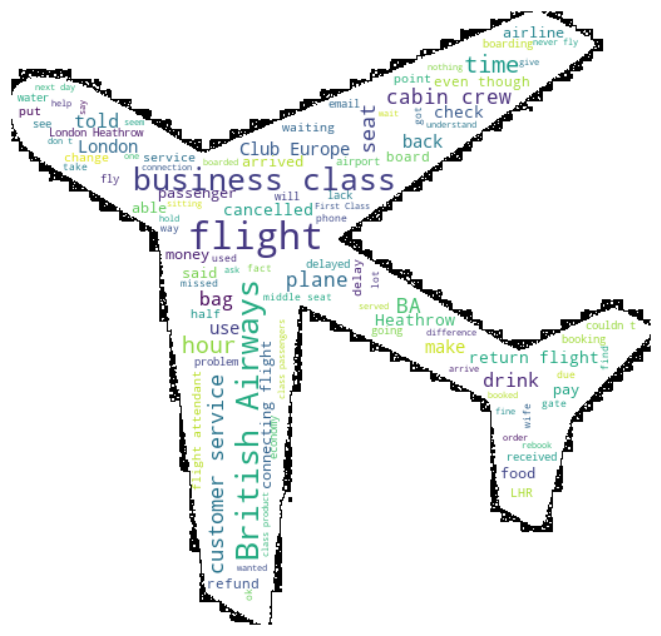

In [13]:
text_data = ' '.join(df['review'])
stopwords = set(STOPWORDS)
user_dir = os.path.expanduser('~')
image_path=path.join(user_dir,'Desktop','Python learning...','aeroplane')
custom_mask =np.array(Image.open(image_path))


wc = WordCloud(background_color='white',width=1000,
    height=600, max_words=100, mask=custom_mask,stopwords=stopwords, contour_width=1)


wc.generate(text_data)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



In [14]:
review_text = ' '.join(df['review']).lower()


stopwords = set(STOPWORDS)
words_without_stopwords = [word for word in review_text.split() if word not in stopwords]
freq_words= pd.Series(words_without_stopwords).value_counts()[:50]


print(freq_words)

flight        7918
ba            6290
service       3034
class         2590
business      2590
time          2553
british       2294
us            2294
airways       2183
hours         2109
even          1887
airline       1850
one           1776
good          1739
crew          1739
london        1702
cabin         1702
seats         1665
food          1591
back          1517
flights       1517
heathrow      1480
airport       1480
staff         1443
seat          1443
first         1406
boarding      1369
hour          1332
passengers    1258
customer      1147
never         1073
plane         1073
fly           1073
economy       1036
told           999
meal           999
people         999
club           962
check          962
return         925
cancelled      925
luggage        925
airlines       925
will           888
gate           888
got            851
help           851
next           851
2              851
due            814
Name: count, dtype: int64


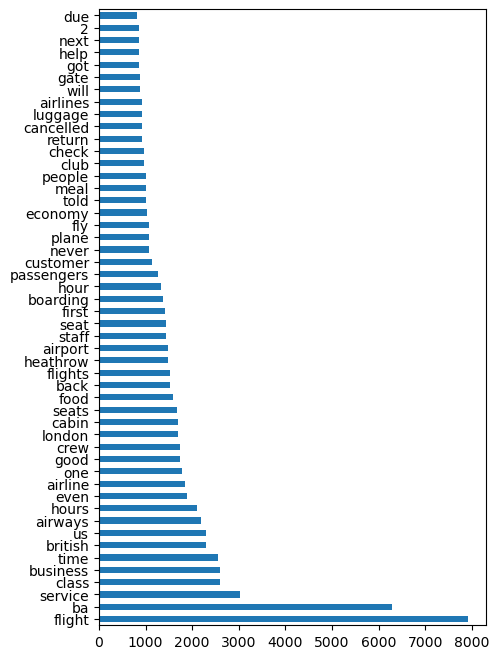

In [15]:
plt.figure(figsize=(5,8))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

### Engineering a sentimental feature for the Reviews

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pass1111/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
example=df['review'][50]
example

'Not    I have flow on BA several times since the airline started nonstop service between Austin TX and London Heathrow Every year the service gets worse I brought a tape measure with me to see how far apart the seats are in the economy section 25½ inches BA has removed bathrooms in order to squeeze a few more rows of seats onto the aircraft Thankfully Im not a big person and was able to squeeze into my seat without being too uncomfortable When BA first started flying out of Austin the food was great Now when I arrive at Heathrow I get real food and take it on the plane with me I dont know where or who makes BAs food but it is not eatable If BA did not have a direct flight from my hometown to London I would fly with a different airline When we checked into Heathrow the line was extremely long and only one person was checking people in It took nearly an hour to get to the counter I understand airlines are making record profits and need to make up lost revenue from the pandemic but I thi

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from tqdm.notebook import tqdm

sid = SentimentIntensityAnalyzer()

In [19]:
res=sid.polarity_scores('I am so happy')

In [20]:
res={}
for index,row in tqdm(df.iterrows()):
    text=row['review']
    res[index] = sid.polarity_scores(text)
    

0it [00:00, ?it/s]

In [21]:
res

{0: {'neg': 0.158, 'neu': 0.812, 'pos': 0.031, 'compound': -0.943},
 1: {'neg': 0.073, 'neu': 0.764, 'pos': 0.163, 'compound': 0.9493},
 2: {'neg': 0.091, 'neu': 0.814, 'pos': 0.095, 'compound': 0.1824},
 3: {'neg': 0.101, 'neu': 0.837, 'pos': 0.062, 'compound': -0.8462},
 4: {'neg': 0.05, 'neu': 0.864, 'pos': 0.086, 'compound': 0.7708},
 5: {'neg': 0.151, 'neu': 0.821, 'pos': 0.028, 'compound': -0.9643},
 6: {'neg': 0.128, 'neu': 0.81, 'pos': 0.062, 'compound': -0.6801},
 7: {'neg': 0.03, 'neu': 0.876, 'pos': 0.094, 'compound': 0.882},
 8: {'neg': 0.069, 'neu': 0.803, 'pos': 0.128, 'compound': 0.9737},
 9: {'neg': 0.064, 'neu': 0.845, 'pos': 0.091, 'compound': 0.8861},
 10: {'neg': 0.071, 'neu': 0.697, 'pos': 0.231, 'compound': 0.969},
 11: {'neg': 0.14, 'neu': 0.767, 'pos': 0.093, 'compound': -0.8855},
 12: {'neg': 0.124, 'neu': 0.859, 'pos': 0.017, 'compound': -0.9359},
 13: {'neg': 0.061, 'neu': 0.813, 'pos': 0.126, 'compound': 0.9856},
 14: {'neg': 0.128, 'neu': 0.78, 'pos': 0.092

In [22]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699
neg,0.158,0.0730,0.0910,0.1010,0.0500,0.1510,0.1280,0.030,0.0690,0.0640,...,0.0150,0.144,0.1570,0.142,0.1120,0.0730,0.0880,0.0370,0.1540,0.1430
neu,0.812,0.7640,0.8140,0.8370,0.8640,0.8210,0.8100,0.876,0.8030,0.8450,...,0.8510,0.712,0.7580,0.808,0.7570,0.8510,0.8750,0.9340,0.7550,0.8450
pos,0.031,0.1630,0.0950,0.0620,0.0860,0.0280,0.0620,0.094,0.1280,0.0910,...,0.1340,0.144,0.0850,0.051,0.1310,0.0750,0.0360,0.0290,0.0910,0.0120
compound,-0.943,0.9493,0.1824,-0.8462,0.7708,-0.9643,-0.6801,0.882,0.9737,0.8861,...,0.9698,-0.000,-0.9475,-0.931,0.7147,0.5999,-0.8793,-0.7449,-0.5574,-0.9313


In [23]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index()
vaders=vaders.merge(df, how='left', left_on='index', right_index=True)
vaders

,index,neg,neu,pos,compound,review
0,0,0.158,0.812,0.031,-0.9430,As always when I fly BA it was a total sha...
1,1,0.073,0.764,0.163,0.9493,First time using BA business class but we wer...
2,2,0.091,0.814,0.095,0.1824,Not Extremely rude ground service We were n...
3,3,0.101,0.837,0.062,-0.8462,My son and I flew to Geneva last Sunday for a...
4,4,0.050,0.864,0.086,0.7708,For the price paid bought during a sale it wa...
...,...,...,...,...,...,...
3695,3695,0.073,0.851,0.075,0.5999,This is to express our displeasure and concer...
3696,3696,0.088,0.875,0.036,-0.8793,I flew London to Malaga on 27 August in Club ...
3697,3697,0.037,0.934,0.029,-0.7449,I arrived at the airport about 25 hours befor...
3698,3698,0.154,0.755,0.091,-0.5574,Filthy plane cabin staff ok appalling custome...


In [24]:
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
labels = ['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive', 'Extremely Positive']

vaders['sentiment_category'] = pd.cut(vaders['compound'], bins=bins, labels=labels)


print(vaders[['compound', 'sentiment_category']])

      compound  sentiment_category
0      -0.9430       Very Negative
1       0.9493  Extremely Positive
2       0.1824   Slightly Positive
3      -0.8462       Very Negative
4       0.7708  Extremely Positive
...        ...                 ...
3695    0.5999       Very Positive
3696   -0.8793       Very Negative
3697   -0.7449            Negative
3698   -0.5574            Negative
3699   -0.9313       Very Negative

[3700 rows x 2 columns]


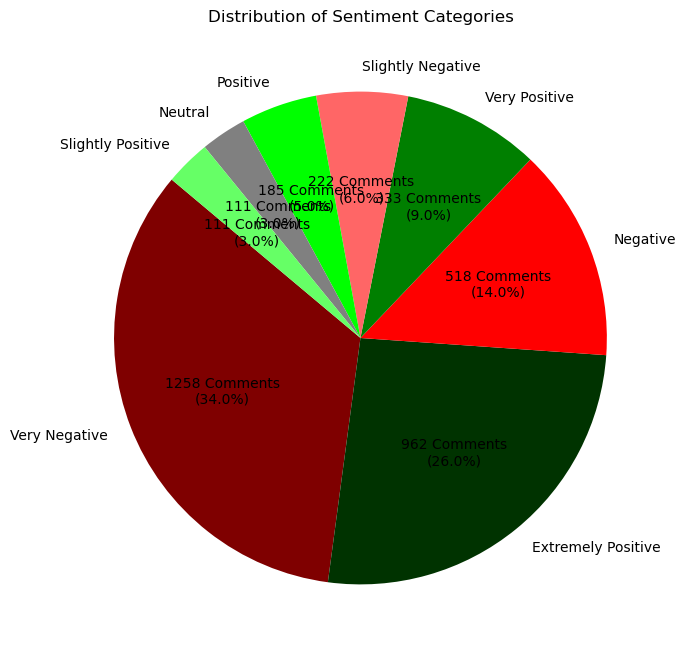

In [25]:
sentiment_counts = vaders['sentiment_category'].value_counts()


colors = ['#7F0000','#003300' , '#FF0000','#007F00', '#FF6666', '#00FF00', '#808080', '#66FF66']
labels = ['Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive', 'Extremely Positive']



plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct=lambda p: '{:.0f} Comments\n({:.1f}%)'.format(p * len(vaders) / 100, p), startangle=140, colors=colors)
plt.title('Distribution of Sentiment Categories')
plt.show()

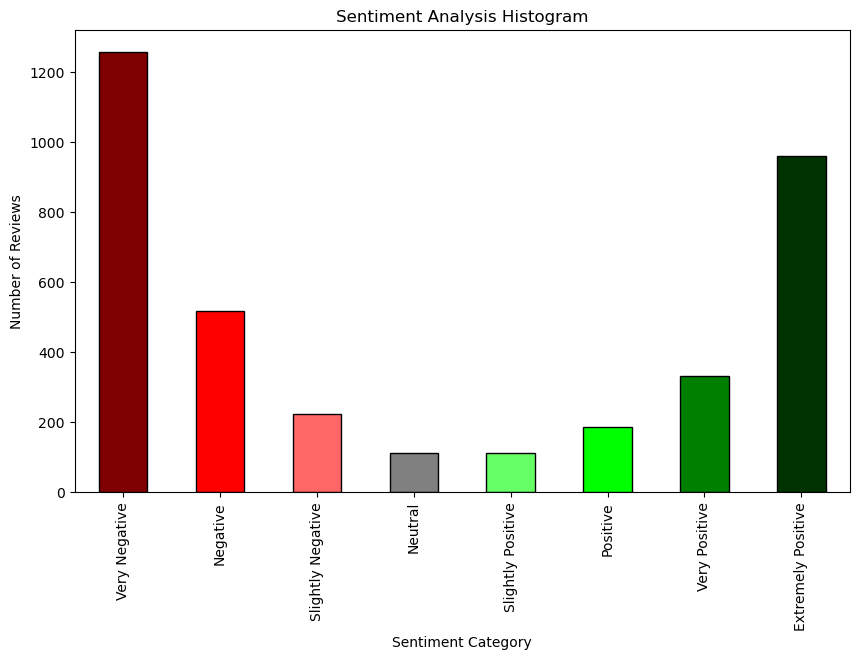

In [26]:
sentiment_counts = vaders['sentiment_category'].value_counts()


colors = ['#7F0000', '#FF0000', '#FF6666', '#808080', '#66FF66', '#00FF00', '#007F00', '#003300'
]


plt.figure(figsize=(10, 6))
sentiment_counts.sort_index().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Sentiment Analysis Histogram')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

In [27]:
vaders.head(5)

,index,neg,neu,pos,compound,review,sentiment_category
0,0,0.158,0.812,0.031,-0.9430,As always when I fly BA it was a total sha...,Very Negative
1,1,0.073,0.764,0.163,0.9493,First time using BA business class but we wer...,Extremely Positive
2,2,0.091,0.814,0.095,0.1824,Not Extremely rude ground service We were n...,Slightly Positive
3,3,0.101,0.837,0.062,-0.8462,My son and I flew to Geneva last Sunday for a...,Very Negative
4,4,0.050,0.864,0.086,0.7708,For the price paid bought during a sale it wa...,Extremely Positive


### Negative Reviews on word cloud

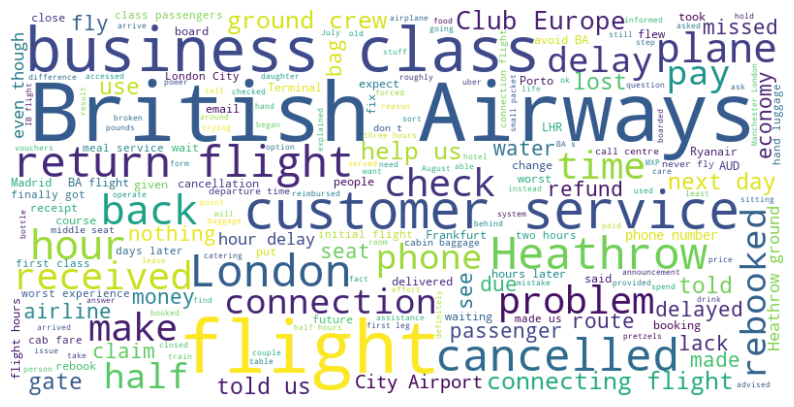

In [28]:

very_negative_reviews = vaders[vaders['sentiment_category'] == 'Very Negative']['review']


text_data_very_negative = ' '.join(very_negative_reviews)





wc = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=200,
    contour_color='black',contour_width=1,
)

wc.generate(text_data_very_negative)


plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Reviews on word cloud

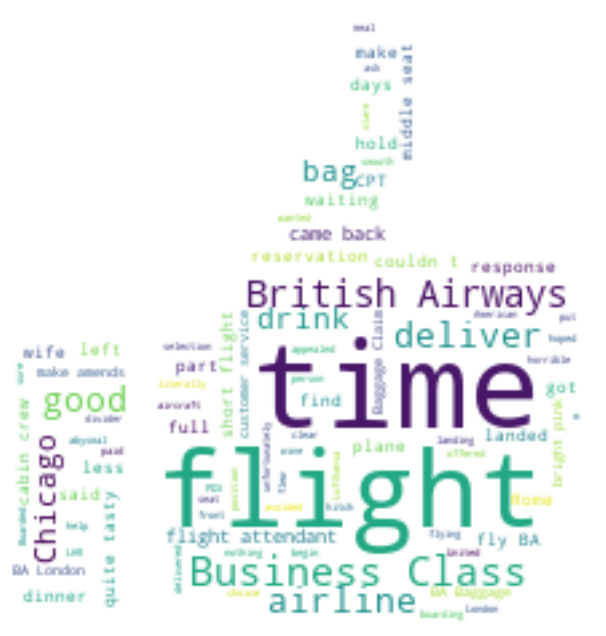

In [29]:
very_positive_reviews = vaders[vaders['sentiment_category'] == 'Very Positive']['review']

text_data_very_positive = ' '.join(very_positive_reviews)
user_dir = os.path.expanduser('~')
image_path1=path.join(user_dir,'Desktop','Python learning...','Shared Image.png')
custom_mask1 =np.array(Image.open(image_path1))

wc_very_positive = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=200,
    contour_color='black',mask=custom_mask1
)

wc_very_positive.generate(text_data_very_positive)
plt.figure(figsize=(10, 8))
plt.imshow(wc_very_positive, interpolation='bilinear')
plt.axis('off')
plt.show()


In [30]:
vaders.sort_values(by='sentiment_category', ascending=False, inplace=True)

In [31]:
vaders.to_csv('British Airways Review Analysis.csv')

In [32]:
from transformers import pipeline

sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Model Building

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline

In [35]:

train_data, test_data, train_labels, test_labels = train_test_split(
    vaders['review'], vaders['sentiment_category'], test_size=0.3, random_state=42
)


In [36]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', SVC()),  
])


text_clf.fit(train_data, train_labels)


predictions = text_clf.predict(test_data)

accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Testing the Vaders Model

In [37]:
new_review =['the crew helpful on my flight']


new_predictions = text_clf.predict(new_review)


for text, prediction in zip(new_review, new_predictions):
    print(f'Text: {text} | Predicted Sentiment: {prediction}')


Text: the crew helpful on my flight | Predicted Sentiment: Very Negative


In [38]:
new_predictions = text_clf.predict(['liked it'])
print(f'Text: {text} | Predicted Sentiment: {prediction}')

Text: the crew helpful on my flight | Predicted Sentiment: Very Negative


model predictions are not entirely accurate
testing data with other models

### Trying the Textblob on the Data

In [39]:

from textblob import TextBlob

def polarity_scores_textblob(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity

    if sentiment_score > 0:
        sentiment_category = 'Positive'
    elif sentiment_score < 0:
        sentiment_category = 'Negative'
    else:
        sentiment_category = 'Neutral'

    return {
        'textblob_polarity': sentiment_score,
        'textblob_sentiment': sentiment_category
    }


In [40]:
df['textblob_polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


print(df[['review', 'textblob_polarity']])

                                                 review  textblob_polarity
0         As always when I fly BA it was a total sha...           0.005208
1      First time using BA business class but we wer...           0.192698
2     Not    Extremely rude ground service We were n...           0.020833
3      My son and I flew to Geneva last Sunday for a...          -0.056872
4      For the price paid bought during a sale it wa...           0.078889
...                                                 ...                ...
3695   This is to express our displeasure and concer...           0.105667
3696   I flew London to Malaga on 27 August in Club ...          -0.040104
3697   I arrived at the airport about 25 hours befor...           0.048769
3698   Filthy plane cabin staff ok appalling custome...          -0.125000
3699       Chaos at Terminal 5 with BA cancellations...          -0.072596

[3700 rows x 2 columns]


In [41]:
vaders['textblob_polarity'] = vaders['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


print(vaders[['review', 'textblob_polarity']])

                                                 review  textblob_polarity
1850  Not    I have flow on BA several times since t...           0.111184
2207  Not   This review is for LHRSYDLHR BA015 and B...           0.152385
1013   Check in was chaotic and badly organised Even...           0.092465
3355    I am a frequent flyer with BA and have been ...           0.168056
2204   For the price paid bought during a sale it wa...           0.078889
...                                                 ...                ...
1828  Dear Community I feel compelled to share the u...          -0.021429
1818  Once again a terrible business class experienc...          -0.128462
1816   I was going to fly to Frankfurt from Glasgow ...           0.050758
1812  Not    Beware BA dont provide any refund due t...          -0.073958
3699       Chaos at Terminal 5 with BA cancellations...          -0.072596

[3700 rows x 2 columns]


In [42]:
vaders

,index,neg,neu,pos,compound,review,sentiment_category,textblob_polarity
1850,1850,0.024,0.901,0.076,0.8708,Not I have flow on BA several times since t...,Extremely Positive,0.111184
2207,2207,0.030,0.876,0.094,0.8820,Not This review is for LHRSYDLHR BA015 and B...,Extremely Positive,0.152385
1013,1013,0.061,0.813,0.126,0.9856,Check in was chaotic and badly organised Even...,Extremely Positive,0.092465
3355,3355,0.050,0.784,0.165,0.9879,I am a frequent flyer with BA and have been ...,Extremely Positive,0.168056
2204,2204,0.050,0.864,0.086,0.7708,For the price paid bought during a sale it wa...,Extremely Positive,0.078889
...,...,...,...,...,...,...,...,...
1828,1828,0.132,0.789,0.079,-0.9641,Dear Community I feel compelled to share the u...,Very Negative,-0.021429
1818,1818,0.131,0.853,0.016,-0.9465,Once again a terrible business class experienc...,Very Negative,-0.128462
1816,1816,0.149,0.819,0.031,-0.9751,I was going to fly to Frankfurt from Glasgow ...,Very Negative,0.050758
1812,1812,0.124,0.859,0.017,-0.9359,Not Beware BA dont provide any refund due t...,Very Negative,-0.073958


In [43]:
def get_sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


vaders['polarity'] = vaders['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
vaders['sentiment_category'] =vaders['polarity'].apply(get_sentiment_category)


print(vaders[['review', 'polarity', 'sentiment_category']])

                                                 review  polarity  \
1850  Not    I have flow on BA several times since t...  0.111184   
2207  Not   This review is for LHRSYDLHR BA015 and B...  0.152385   
1013   Check in was chaotic and badly organised Even...  0.092465   
3355    I am a frequent flyer with BA and have been ...  0.168056   
2204   For the price paid bought during a sale it wa...  0.078889   
...                                                 ...       ...   
1828  Dear Community I feel compelled to share the u... -0.021429   
1818  Once again a terrible business class experienc... -0.128462   
1816   I was going to fly to Frankfurt from Glasgow ...  0.050758   
1812  Not    Beware BA dont provide any refund due t... -0.073958   
3699       Chaos at Terminal 5 with BA cancellations... -0.072596   

     sentiment_category  
1850           Positive  
2207           Positive  
1013           Positive  
3355           Positive  
2204           Positive  
...            

In [44]:
final_df=vaders
final_df.head(5)

,index,neg,neu,pos,compound,review,sentiment_category,textblob_polarity,polarity
1850,1850,0.024,0.901,0.076,0.8708,Not I have flow on BA several times since t...,Positive,0.111184,0.111184
2207,2207,0.030,0.876,0.094,0.8820,Not This review is for LHRSYDLHR BA015 and B...,Positive,0.152385,0.152385
1013,1013,0.061,0.813,0.126,0.9856,Check in was chaotic and badly organised Even...,Positive,0.092465,0.092465
3355,3355,0.050,0.784,0.165,0.9879,I am a frequent flyer with BA and have been ...,Positive,0.168056,0.168056
2204,2204,0.050,0.864,0.086,0.7708,For the price paid bought during a sale it wa...,Positive,0.078889,0.078889


In [45]:
final_df['sentiment_average_score'] = final_df[['compound', 'polarity']].mean(axis=1)

In [46]:
final_df=final_df.drop(columns=['textblob_polarity'])
final_df

,index,neg,neu,pos,compound,review,sentiment_category,polarity,sentiment_average_score
1850,1850,0.024,0.901,0.076,0.8708,Not I have flow on BA several times since t...,Positive,0.111184,0.490992
2207,2207,0.030,0.876,0.094,0.8820,Not This review is for LHRSYDLHR BA015 and B...,Positive,0.152385,0.517193
1013,1013,0.061,0.813,0.126,0.9856,Check in was chaotic and badly organised Even...,Positive,0.092465,0.539032
3355,3355,0.050,0.784,0.165,0.9879,I am a frequent flyer with BA and have been ...,Positive,0.168056,0.577978
2204,2204,0.050,0.864,0.086,0.7708,For the price paid bought during a sale it wa...,Positive,0.078889,0.424844
...,...,...,...,...,...,...,...,...,...
1828,1828,0.132,0.789,0.079,-0.9641,Dear Community I feel compelled to share the u...,Negative,-0.021429,-0.492764
1818,1818,0.131,0.853,0.016,-0.9465,Once again a terrible business class experienc...,Negative,-0.128462,-0.537481
1816,1816,0.149,0.819,0.031,-0.9751,I was going to fly to Frankfurt from Glasgow ...,Positive,0.050758,-0.462171
1812,1812,0.124,0.859,0.017,-0.9359,Not Beware BA dont provide any refund due t...,Negative,-0.073958,-0.504929


In [47]:
final_df.iloc[1816]


index                                                                    261
neg                                                                    0.058
neu                                                                    0.942
pos                                                                      0.0
compound                                                             -0.4588
review                     Our connecting flight from London to Glasgow w...
sentiment_category                                                  Negative
polarity                                                           -0.112727
sentiment_average_score                                            -0.285764
Name: 261, dtype: object


### Testing the TextBlob sentiment analysis

In [51]:
text_to_test = "the crew were helpful on my flight but overall i will ask to stay away from this airline"

result = polarity_scores_textblob(text_to_test)

print(result)


{'textblob_polarity': 0.0, 'textblob_sentiment': 'Neutral'}


In [52]:
final_df.to_csv("British Airways Skytrax analysis.csv")

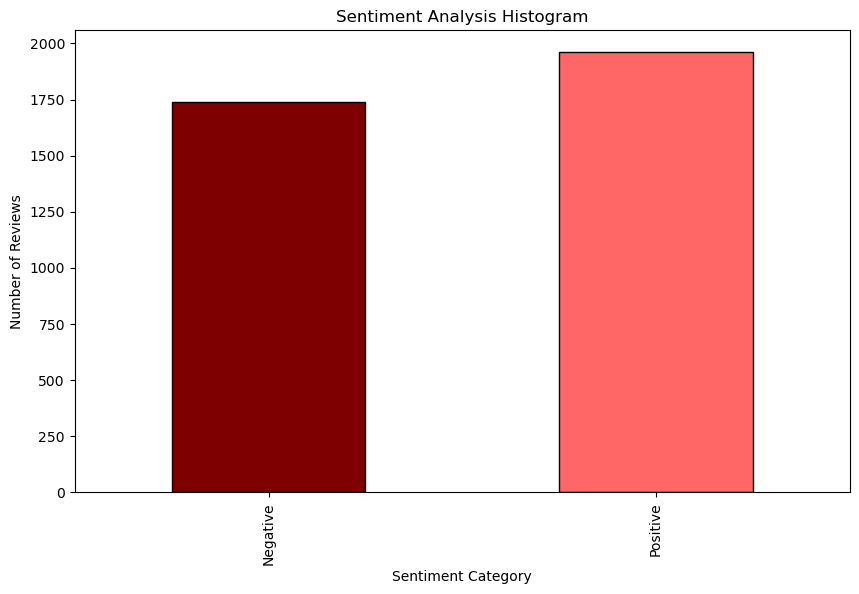

In [53]:
sentiment_counts = final_df['sentiment_category'].value_counts()


colors = ['#7F0000', '#FF6666']

plt.figure(figsize=(10, 6))
sentiment_counts.sort_index().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Sentiment Analysis Histogram')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()